<a href="https://colab.research.google.com/github/nabdeep-patel/computational-physics/blob/main/Worksheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

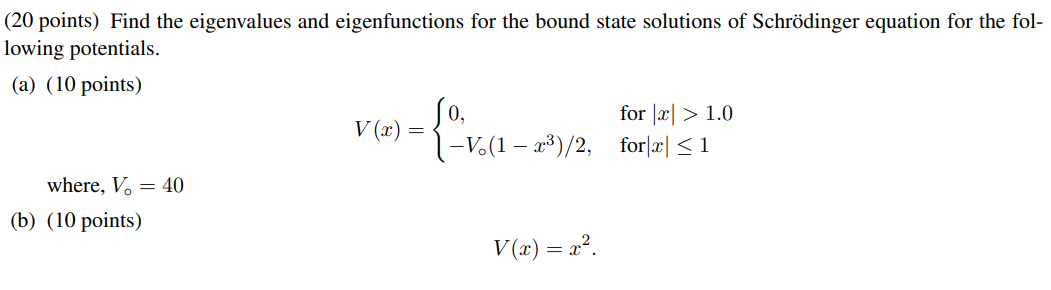

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# function used to find the energy eigenvalues using the secant method
# uses the method as the score2() to find the mismatch between the wavefunction derivatives

def secant(ks,f,method,ybound):
    k1, k2 = ks #initial guess
    iter = 0
    while abs(method(k2,f,ybound))>tol and iter<maxiter:
        f1 = method(k1,f,ybound)
        f2 = method(k2,f,ybound)
        k1, k2 = k2, (f2*k1 - f1*k2)/(f2 - f1)
        iter += 1
        print(iter, k1, k2, method(k2,f,ybound))
    if iter == maxiter:
        return iter, None
    else:
        return iter, k2

In [ ]:
# standard RK4 method, it is used here to integrate the schrodinger equation
def rk4(f,x,y,k,h):
    k1 = h*f(x,y,k)
    k2 = h*f(x + h/2, y + k1/2, k)
    k3 = h*f(x + h/2, y + k2/2, k)
    k4 = h*f(x + h, y + k3, k)
    return y + (k1+2*k2+2*k3+k4)/6

# The following is a caller function. It integrates f from xlim[0] to xlim[1] with initial condition yini.
# The parameter k is included in the argument along with the number of points N.
def caller_rk4(f,xlim,yini,k,N):
    x1, x2 = xlim
    xs = np.linspace(x1, x2, N)
    h = xs[1] - xs[0]
    y = yini
    ys = np.zeros((N,len(yini)))
    for i in range(N):
        ys[i] = np.array(y)
        y = rk4(f, xs[i], y, k, h)
    return xs, ys

## Part a

In [ ]:
# The rhs of Schrodinger equation (using vectorized form)
def odefun2(x,y,E):
    k2 = E - pot(x);
    return np.array([y[1], -k2 * y[0]])

# The potential
def pot(x):
    if abs(x)>Lo:
        return 0.0
    else:
        return -Vo*(Lo - x**3)/2

# The score. Note: we are integrating from the right and from the left and checking the difference at one of the turning points.
def score2(E,f,ybound):
    # Start from the left
    yini1 = (ybound[0], 1.0e-2);
    # psi_<
    xs1, ys1 = caller_rk4(odefun2,xlim,yini1,E,N)
    a = abs(xs1 + Lo);
    # find solution at x = Lo (left turning point)
    n1=np.where(a == np.min(a))[0][0]

    # Start from right
    yini2 = (ybound[1], 1.0e-2)
    # psi_>
    xs2, ys2 = caller_rk4(odefun2,xlim[-1::-1],yini2,E,N)
    a = abs(xs2 + Lo);
    # find solution at x = Lo (left turning point)
    n2=np.where(a == np.min(a))[0][0]

    # scale psi_>
    ys2 = ys1[n1][0]*ys2/ys2[n2][0]
    # return the difference of derivatives as score
    return ys1[n1][1] - ys2[n2][1]

In [ ]:
Vo = 40
Lo = 1.0
xlim = (-3.0, 3.0)
ybound = (0.0, 0.0)
yini = (ybound[0], 0.1) # 1.0e-2 is an arbitrary number finally adjusted by normalization
N = 129
maxiter = 50
tol = 1.0e-5

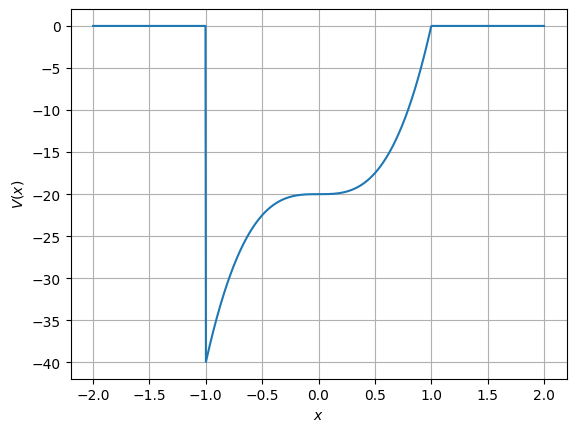

In [ ]:
# Visualisation of the potential well
v =[]
x = np.linspace(-2,2,1000)
for i in x:
  v.append(pot(i))

plt.plot(x,v);
plt.xlabel("$x$")
plt.ylabel("$V(x)$");
plt.grid()

In [ ]:
Es = np.linspace(-Vo, 0, 1000);
scores = [score2(E, odefun2, ybound) for E in Es];

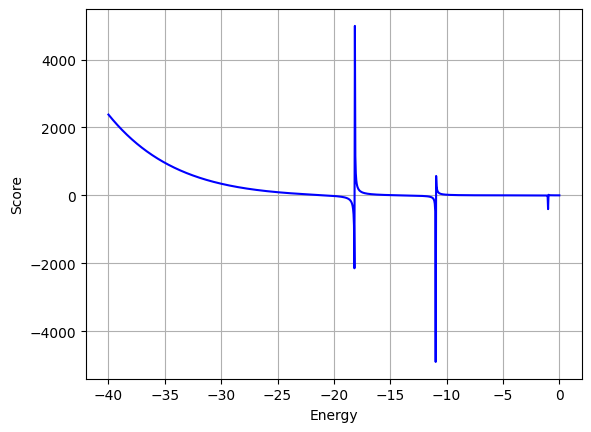

In [ ]:
plt.plot(Es,scores,'b-');
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

### Ground State

(-22.0, -15.0)

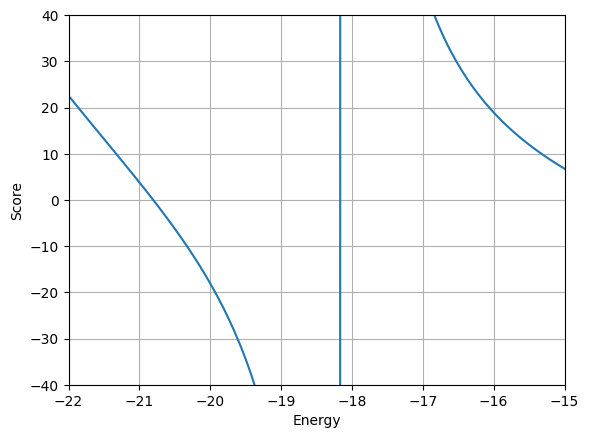

In [ ]:
plt.plot(Es,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-40.,40.])
plt.xlim([-22.0,-15.0])

In [ ]:
Eini=(-21,-20)
iter,Eeigen = secant(Eini,odefun2,score2,ybound);

1 -20 -20.826273570932155 0.42667055749647886
2 -20.826273570932155 -20.80721719844809 0.05074973545755057
3 -20.80721719844809 -20.804644566644665 -0.00010242513605618342
4 -20.804644566644665 -20.804649748374597 2.4860980829544133e-08


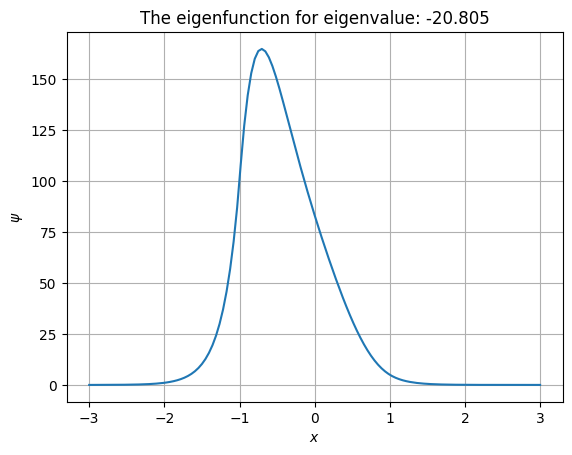

In [ ]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen, N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")
plt.title(f"The wavefunction for eigenvalue: {Eeigen:.3f}");

### First Excited State

(-15.0, -5.0)

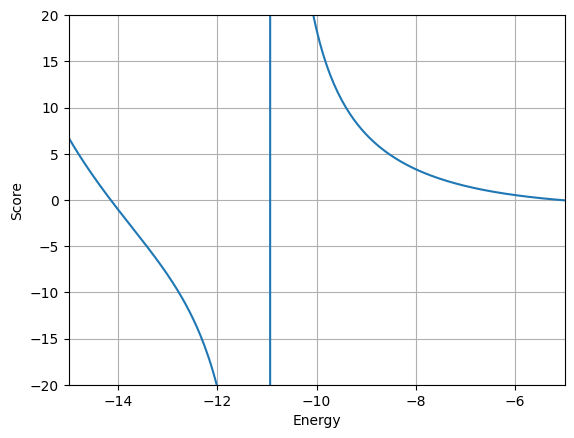

In [ ]:
plt.plot(Es,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-20.,20.])
plt.xlim([-15.0,-5.0])

In [ ]:
Eini=(-14.5,-14)
iter,Eeigen = secant(Eini,odefun2,score2,ybound);

1 -14 -14.145074889955376 -0.03604117581654087
2 -14.145074889955376 -14.15022774994827 0.00041616367618679817
3 -14.15022774994827 -14.150168929606815 -1.8191062167716154e-07


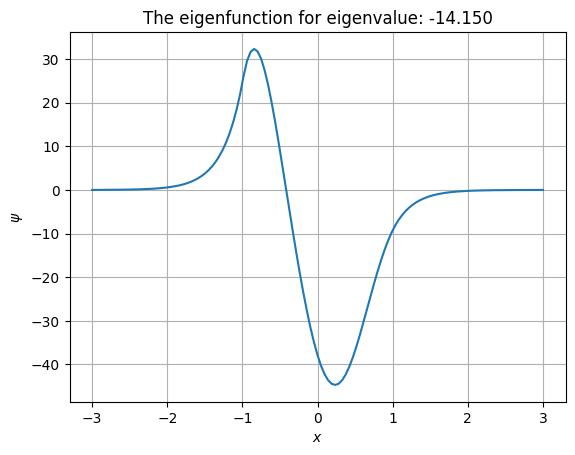

In [ ]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen, N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")
plt.title(f"The wavefunction for eigenvalue: {Eeigen:.3f}");

### Second Excited State

(-6.0, -0.0)

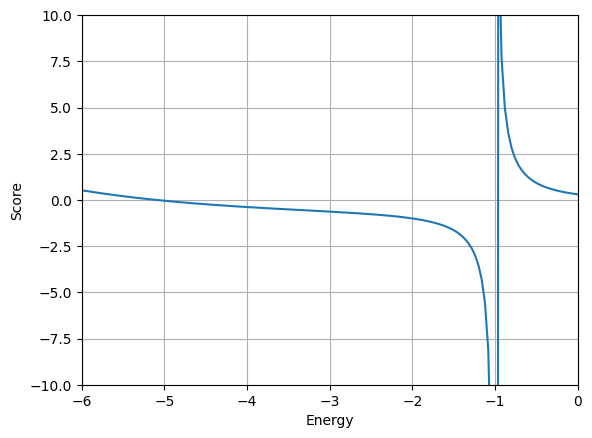

In [ ]:
plt.plot(Es,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-10.,10.])
plt.xlim([-6.0,-0.0])

In [ ]:
Eini=(-5.8,-4.8)
iter,Eeigen = secant(Eini,odefun2,score2,ybound);

1 -4.8 -5.0469084272512355 -0.023632939319794155
2 -5.0469084272512355 -5.103927412398274 0.0018934865922837218
3 -5.103927412398274 -5.099697886327785 -2.5966731936388765e-05
4 -5.099697886327785 -5.099755104165961 -2.807022575490592e-08


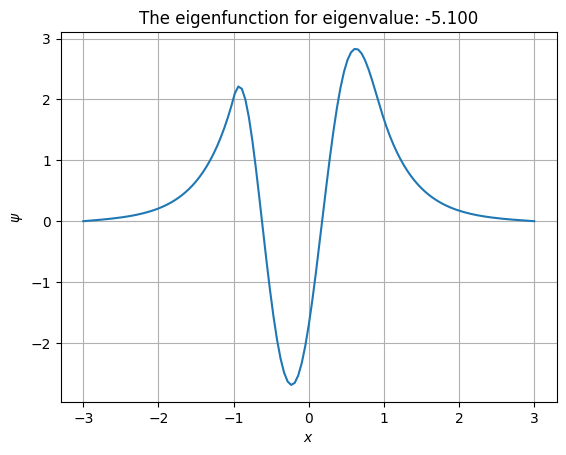

In [ ]:
xs, ys = caller_rk4(odefun2, xlim, yini, Eeigen, N);
y1 = [y[0] for y in ys];
plt.plot(xs, y1);
plt.grid();
plt.xlabel("$x$")
plt.ylabel("$\\psi$")
plt.title(f"The wavefunction for eigenvalue: {Eeigen:.3f}");

## Part b

In [ ]:
# The rhs of Schrodinger equation (using vectorized form)
def odefun2(x,y,E):
    k2 = E - pot(x);
    return np.array([y[1], -k2 * y[0]])

# The potential
def pot(x):
    return x ** 2

# The score. Note: we are integrating from the right and from the left and checking the difference at one of the turning points.
def score2(E,f,ybound):
    # Start from the left
    yini1 = (ybound[0], 0.714);
    # psi_<
    xs1, ys1 = caller_rk4(odefun2,xlim,yini1,E,N)
    a = abs(xs1 + Lo);
    # find solution at x = Lo (left turning point)
    n1=np.where(a == np.min(a))[0][0]

    # Start from right
    yini2 = (ybound[1], 1.0e-2)
    # psi_>
    xs2, ys2 = caller_rk4(odefun2,xlim[-1::-1],yini2,E,N)
    a = abs(xs2 + Lo);
    # find solution at x = Lo (left turning point)
    n2=np.where(a == np.min(a))[0][0]

    # scale psi_>
    ys2 = ys1[n1][0]*ys2/ys2[n2][0]
    # return the difference of derivatives as score
    return ys1[n1][1] - ys2[n2][1]

In [ ]:
xlim = (-3.0, 3.0)
ybound = (0.0, 0.0)
yini = (ybound[0], 0.714)
N = 129
maxiter = 50
tol = 1.0e-5

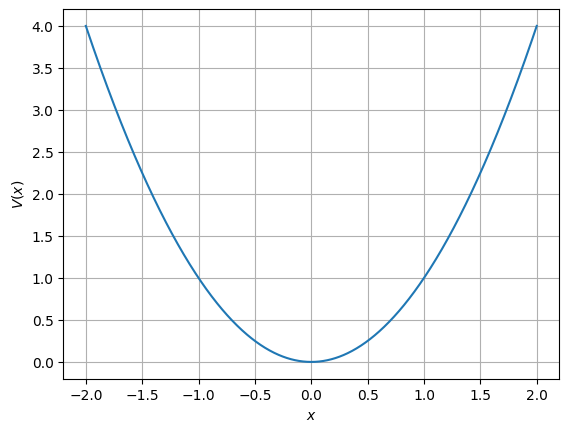

In [ ]:
# Visualisation of the potential well
v =[]
x = np.linspace(-2,2,1000)
for i in x:
  v.append(pot(i))

plt.plot(x,v);
plt.xlabel("$x$")
plt.ylabel("$V(x)$");
plt.grid()

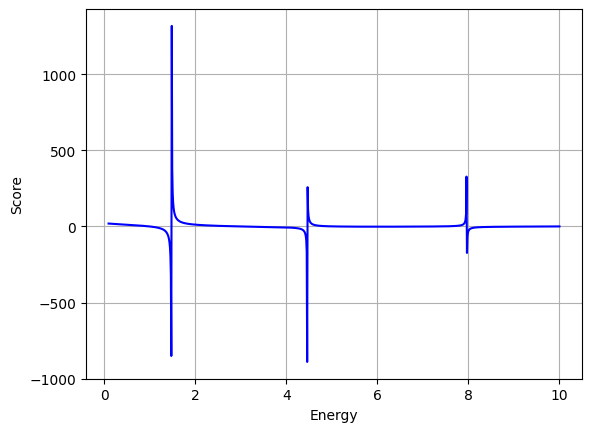

In [ ]:
Es = np.linspace(0.1, 10, 1000);
scores = [score2(E, odefun2, ybound) for E in Es];
plt.plot(Es,scores,'b-');
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");

### Ground State

(4.0, 6.0)

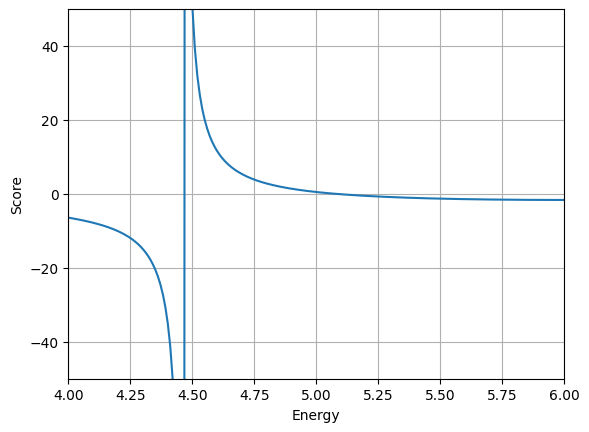

In [ ]:
plt.plot(Es,scores);
plt.grid()
plt.xlabel("Energy");
plt.ylabel("Score");
plt.ylim([-50.,50.])
plt.xlim([4,6])